In [8]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import tensorflow as tf                                             #tensorflow 기본 import
from tensorflow.keras.models import Sequential                     # model box 구성
from tensorflow.keras.layers import Flatten, Dense   # model 안의 input layer와
                                                                    # output layer를 구성
from tensorflow.keras.optimizers import Adam,SGD ,RMSprop                        #알고리즘 담당
from sklearn.model_selection import train_test_split              # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler                    # 데이터 정규화 -> 컴퓨터가 큰숫자를 작은 숫자로 변경( 0~1사이 실수 값으로
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
tf.keras.applications.InceptionV3(
    include_top=True, # classification (softmax) 부분을 포함할 것인지 선택하는 것입니다.
    weights="imagenet", # imageNet으로 pre-trained 된 모델을 받을 것인지를 선택하는 것입니다. 만약 pre-trained 된 모델을 받길 원하지 않는다면 None으로 넣으면 됩니다.
    input_tensor=None, 
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

NameError: name 'tf' is not defined

In [10]:
train_dir="./SUV/train"
test_dir="./SUV/test"

In [11]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datageb=ImageDataGenerator(rescale=1/255)

In [12]:

train_genrator=train_datagen.flow_from_directory(
train_dir,
classes=["rook","paper","scissors"],
                            
target_size=(150,150), 
batch_size=20, 
class_mode="categorical",subset="training"  
)
test_genrator=train_datagen.flow_from_directory(
test_dir, 
classes=["rook","paper","scissors"],
                        
batch_size=20, 
class_mode="categorical"  
)
  

Found 0 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [7]:
model=Sequential()

In [8]:
from tensorflow.keras.applications import VGG16
model_base=VGG16(weights="imagenet",
                 include_top=False,#cassifaction 제외
                  input_shape=(150,150,3))
model_base.trainable=False #parmter(filter)동결
model.add(model_base)
#Fully Conection Layer(DNN)의 inpit layer
model.add(Flatten())#전체 데이터를 4차원에서 2차원으로 변경
# Hidden Layer
model.add(Dense(units=256,activation="relu"))

#ourput Layer
model.add(Dense(units=1,activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
model.compile(optimizer=Adam(learning_rate=0.00001),
                loss ='binary_crossentropy',
                metrics=["accuracy"])


In [10]:
hist=model.fit(train_genrator,
               steps_per_epoch=100,
               epochs=30,
               verbose=1,
               validation_data=test_genrator,
               validation_steps=50)

Epoch 1/30
100/100 [==============================] - 26s 201ms/step - loss: 0.5824 - accuracy: 0.7025 - val_loss: 0.4966 - val_accuracy: 0.7930
Epoch 2/30
100/100 [==============================] - 20s 202ms/step - loss: 0.4343 - accuracy: 0.8445 - val_loss: 0.4155 - val_accuracy: 0.8280
Epoch 3/30
100/100 [==============================] - 20s 202ms/step - loss: 0.3633 - accuracy: 0.8695 - val_loss: 0.3692 - val_accuracy: 0.8440
Epoch 4/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3181 - accuracy: 0.8825 - val_loss: 0.3433 - val_accuracy: 0.8460
Epoch 5/30
100/100 [==============================] - 20s 199ms/step - loss: 0.2871 - accuracy: 0.8955 - val_loss: 0.3289 - val_accuracy: 0.8560
Epoch 6/30
100/100 [==============================] - 20s 199ms/step - loss: 0.2658 - accuracy: 0.9090 - val_loss: 0.3183 - val_accuracy: 0.8640
Epoch 7/30
100/100 [==============================] - 20s 200ms/step - loss: 0.2486 - accuracy: 0.9185 - val_loss: 0.3053 - val_ac

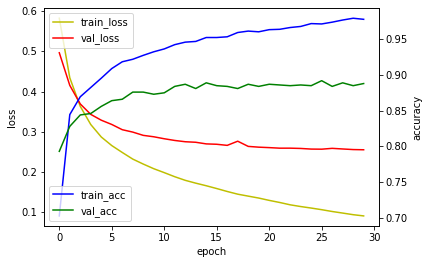

In [11]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")